# Balaton Szupermaraton egyéni eredmény kiértékelés
### Csizmazia Máté - XI32IS

A Notebook témája a BSZM egyéni eredményeinek a kiértékelése lesz, amelyekből kimutatást tudunk készíteni, hogy egy adott személynek mekkora esélyei lehetnek saját tempóban befejezni a versenyt. Kimutatást tudunk készíteni, hogy egy adott korosztályba eső csoport mekkora részben fejezte be a versenyt, vagy adta fel. Mivel ez egy konkrét személynek készülő kimutatás lesz, tudjuk hogy a személy sebessége körülbelül 7:00 perc kilóméterenként, tudjuk az életkorát, és ezáltal azt is hogy melyik korcsoportba tartozik (F4), ami oszlopként már megtalálható a felhasználandó adathalmazban.

Továbbá érdekes lehet több grafikon is mint:
* Milyen eloszlású a jelentkezők kora
* Milyen eloszlású a futók sebessége

Az [adathalmazt](http://www.futanet.hu/cikk/bsi-balaton-szupermaraton-eredmenyek), már az igénylő személytől kaptam meg összesített xlsx formában, amiből éves bontásokra 2015-2020 között külön csv fájlokba exportáltam az adatokat, ezért a továbbiakban ezekkel tervezek dolgozni.

## Adatmigráció

Először is be kell olvasnunk az adathalmazainkat.

In [55]:
import pandas as pd
import numpy as np
from datetime import timedelta
local_path = '/Users/csizi/Development/marathon_statistics/dataset/csv/'

bszm_2020 = pd.read_csv(local_path + 'BSZM_2020.csv', encoding = "ISO-8859-1", 
                    sep=';', header=0)
bszm_2019 = pd.read_csv(local_path + 'BSZM_2019.csv', encoding = "ISO-8859-1", 
                    sep=';', header=0)
bszm_2018 = pd.read_csv(local_path + 'BSZM_2018.csv', encoding = "ISO-8859-1", 
                    sep=';', header=0)
bszm_2017 = pd.read_csv(local_path + 'BSZM_2017.csv', encoding = "ISO-8859-1", 
                    sep=';', header=0)
bszm_2016 = pd.read_csv(local_path + 'BSZM_2016.csv', encoding = "ISO-8859-1", 
                    sep=';', header=0)
bszm_2015 = pd.read_csv(local_path + 'BSZM_2015.csv', encoding = "ISO-8859-1", 
                    sep=';', header=0)

In [56]:
bszm_osszes = pd.concat([bszm_2020, bszm_2019, bszm_2018, bszm_2017, bszm_2016, bszm_2015], ignore_index=True)

Miutána a szükséges könyvtárjainkat és az adathalmazt is importáltuk, bele tudunk nézni, hogy milyen adatokat tartalmaz.

In [57]:
bszm_osszes.head(5)

,Hely.,Név/Csapatnév,sz.év.,Kategória,Ország,Csapat,Város,nem,rajtszám,kat.h.,...,3.nap /1.idõ,3.nap/2.idõ,3.nap/3.idõ,3.nap összidõ,4.nap/1.idõ,4.nap/2.idõ,4.nap/3.idõ,4.nap összidõ,eredmény,Megtett táv (km)
0,1.0,Beda Szabolcs,1977.0,F3,HUN,ELTE SE Sashegyi gepárdok,Budapest,F,484.0,F3 / 1,...,0:52:42,1:09:42,0:51:30,2:53:54,1:04:01,1:22:26,1:02:24,3:28:51,13:02:08,196.0
1,2.0,Bódis Tamás,1988.0,F1,HUN,ELTE SE Sashegyi gepárdok,Budapest,F,479.0,F1 / 1,...,0:49:17,1:07:40,0:51:25,2:48:22,1:01:41,1:20:17,1:02:09,3:24:07,13:06:48,196.0
2,3.0,"Theisinger, Wolfgang",1982.0,F2,GER,RC Abschnitt Mitte,Regenstauf,F,511.0,F2 / 1,...,0:56:10,1:14:10,0:54:18,3:04:38,1:09:23,1:28:44,1:05:47,3:43:54,14:05:35,196.0
3,4.0,Strifler Attila,1986.0,F1,HUN,NaN,Gyula,F,407.0,F1 / 2,...,0:56:07,1:14:13,0:55:24,3:05:44,1:09:40,1:28:46,1:07:32,3:45:58,14:22:47,196.0
4,5.0,Szedlák Csaba,1978.0,F3,HUN,Vitalitás SE,Budapest,F,449.0,F3 / 2,...,0:59:34,1:17:00,1:00:59,3:17:03,1:11:29,1:31:19,1:10:47,3:53:35,14:42:39,196.0


In [58]:
bszm_osszes

,Hely.,Név/Csapatnév,sz.év.,Kategória,Ország,Csapat,Város,nem,rajtszám,kat.h.,...,3.nap /1.idõ,3.nap/2.idõ,3.nap/3.idõ,3.nap összidõ,4.nap/1.idõ,4.nap/2.idõ,4.nap/3.idõ,4.nap összidõ,eredmény,Megtett táv (km)
0,1.0,Beda Szabolcs,1977.0,F3,HUN,ELTE SE Sashegyi gepárdok,Budapest,F,484.0,F3 / 1,...,0:52:42,1:09:42,0:51:30,2:53:54,1:04:01,1:22:26,1:02:24,3:28:51,13:02:08,196.0
1,2.0,Bódis Tamás,1988.0,F1,HUN,ELTE SE Sashegyi gepárdok,Budapest,F,479.0,F1 / 1,...,0:49:17,1:07:40,0:51:25,2:48:22,1:01:41,1:20:17,1:02:09,3:24:07,13:06:48,196.0
2,3.0,"Theisinger, Wolfgang",1982.0,F2,GER,RC Abschnitt Mitte,Regenstauf,F,511.0,F2 / 1,...,0:56:10,1:14:10,0:54:18,3:04:38,1:09:23,1:28:44,1:05:47,3:43:54,14:05:35,196.0
3,4.0,Strifler Attila,1986.0,F1,HUN,NaN,Gyula,F,407.0,F1 / 2,...,0:56:07,1:14:13,0:55:24,3:05:44,1:09:40,1:28:46,1:07:32,3:45:58,14:22:47,196.0
4,5.0,Szedlák Csaba,1978.0,F3,HUN,Vitalitás SE,Budapest,F,449.0,F3 / 2,...,0:59:34,1:17:00,1:00:59,3:17:03,1:11:29,1:31:19,1:10:47,3:53:35,14:42:39,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adattisztítás és Transzformáció

Jól látható hogy számos oszlopot tartalmaz, amik közül sokra nem lesz szükségünk a feladat elvégzéséhez. <br/>Ilyen oszlopok példuál: {*Név, Ország, Csapat, Város, Rajtszám*}<br/><br/>Ezeket töröljük is ki.

In [59]:
bszm_osszes.drop(['Név/Csapatnév', 'Ország', 'Csapat', 'Város', 'rajtszám', 'Hely.', 'kat.h.'], axis = 1, inplace=True)

**FYI:**<br/>
*Amennyiben több adathalmazt migrálunk egybe, más oszlopok elhagyására is szükség lehet, mint például: {Helyezés}*



További oszlopokat is törölhetünk, mivel napi bontásban minden időeredményre nem lesz szükségünk. Ezen adatok nagyrésze hiányos, vagy egyszerűen hibás. Ezeket is dobjuk el.


In [60]:
bszm_osszes.drop(['1.nap/1.idõ', '1.nap/2.idõ', '1.nap/3.idõ', '2.nap/1.idõ', '2.nap/2.idõ', '2.nap/3.idõ', '3.nap /1.idõ', '3.nap/2.idõ', '3.nap/3.idõ', '4.nap/1.idõ', '4.nap/2.idõ', '4.nap/3.idõ'], axis = 1, inplace=True)

Így már egy tisztább adathalmaz áll rendelkezésünkre, amikben ténylegesen olyan információk szerepelnek, amikre szükségünk lehet a kiértékelésnél.

In [61]:
bszm_osszes.head(5)

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km)
0,1977.0,F3,F,3:08:51,3:30:32,2:53:54,3:28:51,13:02:08,196.0
1,1988.0,F1,F,3:13:57,3:40:22,2:48:22,3:24:07,13:06:48,196.0
2,1982.0,F2,F,3:23:21,3:53:42,3:04:38,3:43:54,14:05:35,196.0
3,1986.0,F1,F,3:31:41,3:59:24,3:05:44,3:45:58,14:22:47,196.0
4,1978.0,F3,F,3:31:31,4:00:30,3:17:03,3:53:35,14:42:39,196.0


Azt is tudjuk hogy a verseny teljesítéséhez 196 kilóméter lefutására van szükség, ezért ehhez tudunk készíteni egy új attribútumot ami két értéket vehet fel, teljesítette-e vagy nem.

In [62]:
bszm_osszes["befejezte"] = np.where(bszm_osszes['Megtett táv (km)'] < 196, False, True)
bszm_osszes

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte
0,1977.0,F3,F,3:08:51,3:30:32,2:53:54,3:28:51,13:02:08,196.0,True
1,1988.0,F1,F,3:13:57,3:40:22,2:48:22,3:24:07,13:06:48,196.0,True
2,1982.0,F2,F,3:23:21,3:53:42,3:04:38,3:43:54,14:05:35,196.0,True
3,1986.0,F1,F,3:31:41,3:59:24,3:05:44,3:45:58,14:22:47,196.0,True
4,1978.0,F3,F,3:31:31,4:00:30,3:17:03,3:53:35,14:42:39,196.0,True
...,...,...,...,...,...,...,...,...,...,...
1813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


Azok a személyek akik nem fejezték be a versenyt, nekik az időataik eltérőek, és az *eredmény* oszlopban 99:59:59 értéket vesznek fel. Ezt sajnos tisztítani kell vagy törölni, de ha ezeket töröljük elveszik minden adatunk azokról a versenyzőkről akik nem fejezték be a versenyt. Ezért csak az értelmetlen eredményt tartalmazó cellák értékeit cseréljük ki **NaN** értékre.

In [63]:
bszm_osszes = bszm_osszes.replace('99:59:59', np.nan)
bszm_osszes

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte
0,1977.0,F3,F,3:08:51,3:30:32,2:53:54,3:28:51,13:02:08,196.0,True
1,1988.0,F1,F,3:13:57,3:40:22,2:48:22,3:24:07,13:06:48,196.0,True
2,1982.0,F2,F,3:23:21,3:53:42,3:04:38,3:43:54,14:05:35,196.0,True
3,1986.0,F1,F,3:31:41,3:59:24,3:05:44,3:45:58,14:22:47,196.0,True
4,1978.0,F3,F,3:31:31,4:00:30,3:17:03,3:53:35,14:42:39,196.0,True
...,...,...,...,...,...,...,...,...,...,...
1813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


Látható hogy az adathalmazunk még mindig sok hibás értéket tartalmaz, ezeket a hibás értékeket később fogjuk kivenni a halmazunkból. 

Azoknak a versenyzőknek akik feladták a versenyt '99:59:59' értéket kaptak eredménynek, ami természetesen nem elfogadható, mivel ezek a versenyzők egy-két napot lefuthattak.
Ezért az eredmények mezőket újra tudjuk számolni úgy, hogy átalakítjuk **timedelta** típúsúra ezeket a mezőket, és összeadjuk a napok idejét.

In [64]:
bszm_osszes['eredmény'] = pd.to_timedelta(bszm_osszes['eredmény'])
bszm_osszes['1.nap összidõ'] = pd.to_timedelta(bszm_osszes['1.nap összidõ'])
bszm_osszes['2.nap összidõ'] = pd.to_timedelta(bszm_osszes['2.nap összidõ'])
bszm_osszes['3.nap összidõ'] = pd.to_timedelta(bszm_osszes['3.nap összidõ'])
bszm_osszes['4.nap összidõ'] = pd.to_timedelta(bszm_osszes['4.nap összidõ'])
bszm_osszes.dtypes

sz.év.                      float64
Kategória                    object
nem                          object
1.nap összidõ       timedelta64[ns]
2.nap összidõ       timedelta64[ns]
3.nap összidõ       timedelta64[ns]
4.nap összidõ       timedelta64[ns]
eredmény            timedelta64[ns]
Megtett táv (km)            float64
befejezte                      bool
dtype: object

Miután ez megvan, csak össze kell adni a megfelelő cellák értékeit.

In [65]:
eredmény = ['1.nap összidõ', '2.nap összidõ', '3.nap összidõ', '4.nap összidõ']
bszm_osszes['eredmény'] = bszm_osszes[eredmény].sum(axis=1, skipna=True)
bszm_osszes['eredmény'] = bszm_osszes['eredmény'] - pd.to_timedelta(bszm_osszes['eredmény'].dt.days, unit='h')
bszm_osszes

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte
0,1977.0,F3,F,0 days 03:08:51,0 days 03:30:32,0 days 02:53:54,0 days 03:28:51,0 days 13:02:08,196.0,True
1,1988.0,F1,F,0 days 03:13:57,0 days 03:40:22,0 days 02:48:22,0 days 03:24:07,0 days 13:06:48,196.0,True
2,1982.0,F2,F,0 days 03:23:21,0 days 03:53:42,0 days 03:04:38,0 days 03:43:54,0 days 14:05:35,196.0,True
3,1986.0,F1,F,0 days 03:31:41,0 days 03:59:24,0 days 03:05:44,0 days 03:45:58,0 days 14:22:47,196.0,True
4,1978.0,F3,F,0 days 03:31:31,0 days 04:00:30,0 days 03:17:03,0 days 03:53:35,0 days 14:42:39,196.0,True
...,...,...,...,...,...,...,...,...,...,...
1813,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True
1814,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True
1815,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True
1816,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True


Mivel szeretnénk majd kiszámolni a versenyzők sebességét is, ezért az eredmény adatot átalakíthatjuk perc értékre, így könnyebb dolgunk lesz vele.

In [66]:
bszm_osszes["eredmény(perc)"] = bszm_osszes['eredmény'].astype('timedelta64[m]')
bszm_osszes

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte,eredmény(perc)
0,1977.0,F3,F,0 days 03:08:51,0 days 03:30:32,0 days 02:53:54,0 days 03:28:51,0 days 13:02:08,196.0,True,782.0
1,1988.0,F1,F,0 days 03:13:57,0 days 03:40:22,0 days 02:48:22,0 days 03:24:07,0 days 13:06:48,196.0,True,786.0
2,1982.0,F2,F,0 days 03:23:21,0 days 03:53:42,0 days 03:04:38,0 days 03:43:54,0 days 14:05:35,196.0,True,845.0
3,1986.0,F1,F,0 days 03:31:41,0 days 03:59:24,0 days 03:05:44,0 days 03:45:58,0 days 14:22:47,196.0,True,862.0
4,1978.0,F3,F,0 days 03:31:31,0 days 04:00:30,0 days 03:17:03,0 days 03:53:35,0 days 14:42:39,196.0,True,882.0
...,...,...,...,...,...,...,...,...,...,...,...
1813,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0
1814,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0
1815,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0
1816,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0


Így már hozzáadható egy új oszlop az adattáblához, ami mutatja minden személy saját átlag tempóját (perc/km)

In [67]:
bszm_osszes["átlagos tempó (perc/km)"] = bszm_osszes['eredmény'].astype('timedelta64[m]')/bszm_osszes['Megtett táv (km)']
bszm_osszes

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte,eredmény(perc),átlagos tempó (perc/km)
0,1977.0,F3,F,0 days 03:08:51,0 days 03:30:32,0 days 02:53:54,0 days 03:28:51,0 days 13:02:08,196.0,True,782.0,3.989796
1,1988.0,F1,F,0 days 03:13:57,0 days 03:40:22,0 days 02:48:22,0 days 03:24:07,0 days 13:06:48,196.0,True,786.0,4.010204
2,1982.0,F2,F,0 days 03:23:21,0 days 03:53:42,0 days 03:04:38,0 days 03:43:54,0 days 14:05:35,196.0,True,845.0,4.311224
3,1986.0,F1,F,0 days 03:31:41,0 days 03:59:24,0 days 03:05:44,0 days 03:45:58,0 days 14:22:47,196.0,True,862.0,4.397959
4,1978.0,F3,F,0 days 03:31:31,0 days 04:00:30,0 days 03:17:03,0 days 03:53:35,0 days 14:42:39,196.0,True,882.0,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1813,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN
1814,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN
1815,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN
1816,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN


### Adatdiszkretizáció

### Vödrözés

Vödrözési technika alkalmazásával besorolhatjuk a versenyzőket sebességük alapján, egyenlő mélységű vödrökbe. Ez azért lesz jó nekünk, mivel az osztályozás feladat elvégzésénél könnyebben tudunk majd kategórikus adatokkal dolgozni.

In [68]:
bszm_osszes['sebesség kategória'] = pd.qcut(bszm_osszes['átlagos tempó (perc/km)'], 5, labels=['gyors', 'közepesen gyors', 'közepes', 'közepesen lassú', 'lassú'])
bszm_osszes.tail(100)

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte,eredmény(perc),átlagos tempó (perc/km),sebesség kategória
1718,1982.0,F2,F,0 days 05:16:38,NaT,NaT,NaT,0 days 05:16:38,48.0,False,316.0,6.583333,közepesen lassú
1719,1954.0,F4,F,0 days 04:22:14,NaT,NaT,NaT,0 days 04:22:14,48.0,False,262.0,5.458333,gyors
1720,1935.0,F4,F,NaT,0 days 07:14:02,0 days 06:10:10,0 days 07:22:34,0 days 20:46:46,141.0,False,1246.0,8.836879,lassú
1721,1970.0,N3,N,0 days 05:09:33,0 days 06:16:38,NaT,NaT,0 days 11:26:11,101.0,False,686.0,6.792079,közepesen lassú
1722,1973.0,F3,F,0 days 04:57:12,0 days 05:58:11,NaT,NaT,0 days 10:55:23,101.0,False,655.0,6.485149,közepes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN,NaN
1814,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN,NaN
1815,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN,NaN
1816,NaN,NaN,NaN,NaT,NaT,NaT,NaT,0 days 00:00:00,NaN,True,0.0,NaN,NaN


### Duplikált sorok törlése

In [69]:
bszm_osszes.shape

(1818, 13)

Amint már feljebb említettem az adathalmazunk még mindig sok értelmetlen adattal rendelkezik, de szerencsénkre ezeket egyszerűen kitudjuk javítani a duplikátumok törlésével.<br/> <br/> *(Valószínüleg adatmigráció során egy adattáblából nem sikerült rendesen összefűzni az adatokat)*

In [70]:
bszm_osszes.drop_duplicates(inplace=True)
bszm_osszes.shape

(1571, 13)

Körülbelül 250 sortól szabadultunk így meg. Így már látható hogy az adathalmaz legalján nem csak értelmetlen adatok jelennek meg.

In [71]:
bszm_osszes.tail()

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte,eredmény(perc),átlagos tempó (perc/km),sebesség kategória
1726,1980.0,F2,F,0 days 04:17:34,0 days 05:37:34,0 days 04:48:01,NaT,0 days 14:43:09,145.0,False,883.0,6.089655,közepes
1727,1977.0,F2,F,0 days 03:31:53,0 days 04:11:03,NaT,NaT,0 days 07:42:56,101.0,False,462.0,4.574257,gyors
1728,1976.0,F2,F,0 days 04:48:24,NaT,NaT,NaT,0 days 04:48:24,48.0,False,288.0,6.000000,közepesen gyors
1729,1959.0,F4,F,0 days 05:17:14,0 days 06:10:19,0 days 05:10:41,NaT,0 days 16:38:14,145.0,False,998.0,6.882759,közepesen lassú
1730,1997.0,F1,F,0 days 04:46:55,NaT,NaT,NaT,0 days 04:46:55,48.0,False,286.0,5.958333,közepesen gyors


### Értelmetlen adatok törlése

Azokat a személyeket is törölhetjük, akik már az első nap befejezése előtt feladták, vagy csak nem jelentek meg. Nekik az eredményük percben 0.

In [72]:
bszm_osszes.loc[bszm_osszes['eredmény(perc)'] == 0.0] = np.nan
bszm_osszes.dropna(axis=0, how='all', inplace=True)
bszm_osszes.shape

(1554, 13)

### Tisztított adatok mentése

Miután befejeztük az adataink tisztogatását, kiexportálhatjuk magunkak az adathalmazt, hogy a későbbiekben ne kelljen a tisztítás és transzportációs műveleteket elvégezni újra.

In [73]:
bszm_osszes.to_csv('/Users/csizi/Development/marathon_statistics/dataset/csv/cleaned/bszm_osszes_cleaned.csv', sep=';', header=True, index=False)

## EDA vizualizáció


Miután már megtisztítottuk az adathalmazunkat, tudunk játszani vele különböző gráfok segítségével. 

In [74]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

bszm = pd.read_csv('/Users/csizi/Development/marathon_statistics/dataset/csv/cleaned/bszm_osszes_cleaned.csv',  
                    sep=';', header=0)

bszm.shape

(1554, 13)

A kezdő adathalmazunk itt már egyből a tisztított csv fájl.

In [75]:
bszm

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte,eredmény(perc),átlagos tempó (perc/km),sebesség kategória
0,1977.0,F3,F,0 days 03:08:51,0 days 03:30:32,0 days 02:53:54,0 days 03:28:51,0 days 13:02:08,196.0,1.0,782.0,3.989796,gyors
1,1988.0,F1,F,0 days 03:13:57,0 days 03:40:22,0 days 02:48:22,0 days 03:24:07,0 days 13:06:48,196.0,1.0,786.0,4.010204,gyors
2,1982.0,F2,F,0 days 03:23:21,0 days 03:53:42,0 days 03:04:38,0 days 03:43:54,0 days 14:05:35,196.0,1.0,845.0,4.311224,gyors
3,1986.0,F1,F,0 days 03:31:41,0 days 03:59:24,0 days 03:05:44,0 days 03:45:58,0 days 14:22:47,196.0,1.0,862.0,4.397959,gyors
4,1978.0,F3,F,0 days 03:31:31,0 days 04:00:30,0 days 03:17:03,0 days 03:53:35,0 days 14:42:39,196.0,1.0,882.0,4.500000,gyors
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1980.0,F2,F,0 days 04:17:34,0 days 05:37:34,0 days 04:48:01,NaN,0 days 14:43:09,145.0,0.0,883.0,6.089655,közepes
1550,1977.0,F2,F,0 days 03:31:53,0 days 04:11:03,NaN,NaN,0 days 07:42:56,101.0,0.0,462.0,4.574257,gyors
1551,1976.0,F2,F,0 days 04:48:24,NaN,NaN,NaN,0 days 04:48:24,48.0,0.0,288.0,6.000000,közepesen gyors
1552,1959.0,F4,F,0 days 05:17:14,0 days 06:10:19,0 days 05:10:41,NaN,0 days 16:38:14,145.0,0.0,998.0,6.882759,közepesen lassú


Az egyik gráf vizualizálása közben találtam outlier-eket, ezért ezeket is érdemes kiszedni az adathalmazból. Az ő esetükben szürreális értékeket lehetett kapni. Két esetről van csak itt szó, ahol az egyik versenyző adatai alapján csak az első nap versenyzett, és ezalatt 150 kilómétert tett meg nagyon rövid idő alatt. Így produkált egy 2.6 átlagos tempót.

Ezért ezeket töröljük.

In [76]:
bszm.loc[bszm['átlagos tempó (perc/km)'] < 3] = np.nan
bszm.dropna(axis=0, how='all', inplace=True)
bszm.sort_values(by=['átlagos tempó (perc/km)'])

,sz.év.,Kategória,nem,1.nap összidõ,2.nap összidõ,3.nap összidõ,4.nap összidõ,eredmény,Megtett táv (km),befejezte,eredmény(perc),átlagos tempó (perc/km),sebesség kategória
269,1968.0,F4,F,0 days 05:11:04,NaN,NaN,NaN,0 days 05:11:04,80.0,0.0,311.0,3.887500,gyors
273,1976.0,F3,F,0 days 03:20:17,0 days 03:30:29,0 days 02:46:29,NaN,0 days 09:37:15,145.0,0.0,577.0,3.979310,gyors
1114,1990.0,F1,F,0 days 03:31:11,0 days 04:07:02,NaN,NaN,0 days 07:38:13,115.0,0.0,458.0,3.982609,gyors
0,1977.0,F3,F,0 days 03:08:51,0 days 03:30:32,0 days 02:53:54,0 days 03:28:51,0 days 13:02:08,196.0,1.0,782.0,3.989796,gyors
1,1988.0,F1,F,0 days 03:13:57,0 days 03:40:22,0 days 02:48:22,0 days 03:24:07,0 days 13:06:48,196.0,1.0,786.0,4.010204,gyors
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1978.0,F1,F,0 days 03:51:11,NaN,NaN,NaN,0 days 03:51:11,0.0,0.0,231.0,inf,lassú
860,1972.0,F3,F,0 days 05:45:14,NaN,NaN,NaN,0 days 05:45:14,0.0,0.0,345.0,inf,lassú
859,1986.0,F1,F,0 days 05:30:08,NaN,NaN,NaN,0 days 05:30:08,0.0,0.0,330.0,inf,lassú
856,1974.0,F3,F,NaN,NaN,NaN,0 days 06:52:01,0 days 06:52:01,0.0,0.0,412.0,inf,lassú


Mivel már van egy összesített eredményünk, ezért eldobhatjuk azokat az oszlopkat amik **NaN** értéket tartalmaznak. Ezek jelenleg csak a napi idő bontások.

In [77]:
#plt.plot(bszm_osszes['eredmény'], bszm_osszes['átlagos tempó (perc/km)'], marker='o')
bszm.dropna(axis=1, how='any', inplace=True)
bszm

,sz.év.,Kategória,nem,eredmény,Megtett táv (km),befejezte,eredmény(perc),átlagos tempó (perc/km),sebesség kategória
0,1977.0,F3,F,0 days 13:02:08,196.0,1.0,782.0,3.989796,gyors
1,1988.0,F1,F,0 days 13:06:48,196.0,1.0,786.0,4.010204,gyors
2,1982.0,F2,F,0 days 14:05:35,196.0,1.0,845.0,4.311224,gyors
3,1986.0,F1,F,0 days 14:22:47,196.0,1.0,862.0,4.397959,gyors
4,1978.0,F3,F,0 days 14:42:39,196.0,1.0,882.0,4.500000,gyors
...,...,...,...,...,...,...,...,...,...
1549,1980.0,F2,F,0 days 14:43:09,145.0,0.0,883.0,6.089655,közepes
1550,1977.0,F2,F,0 days 07:42:56,101.0,0.0,462.0,4.574257,gyors
1551,1976.0,F2,F,0 days 04:48:24,48.0,0.0,288.0,6.000000,közepesen gyors
1552,1959.0,F4,F,0 days 16:38:14,145.0,0.0,998.0,6.882759,közepesen lassú


Mivel valahogyan visszakerültek az értelmetlen adatok az adathalmazunkba, kénytelenek vagyunk ismét törölni ezeket. 
Ezek azok a cellák ahol az átlagos tempó végtelen, ami azért van mert nullával lettek osztva. 

Dobjuk el őket.

In [78]:
bszm.loc[bszm['átlagos tempó (perc/km)'] == np.inf] = np.nan
bszm.dropna(axis=0, how='all', inplace=True)
bszm.shape

(1536, 9)

Most, hogy ismét tisztogattunk az adathalmazainkon, neki is láthatunk a gráfok készítésének.

### Férfiak és nők részvétele a versenyen

<AxesSubplot:ylabel='nem'>

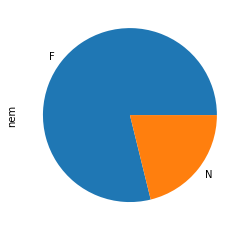

In [79]:
bszm.nem.value_counts().plot(kind='pie')

### Versenyzők akik befejezték vagy feladták a versenyt

<AxesSubplot:ylabel='befejezte'>

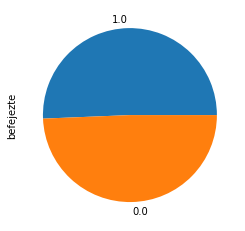

In [80]:
bszm.befejezte.value_counts().plot(kind='pie')

### Pont-pont diagram ami születési évszám alapján mutatja a megtett kilómétert

Érdekességként megemlíthető, hogy itt már kezd kialakulni egy mintázat, ami alapján láthatjuk hogy ténylegesen egy 4 napos versenyről van szó, mivel sok versenyző, egy bizonyos kilóméter megtétele után adta fel a versenyt. 

<AxesSubplot:xlabel='sz.év.', ylabel='Megtett táv (km)'>

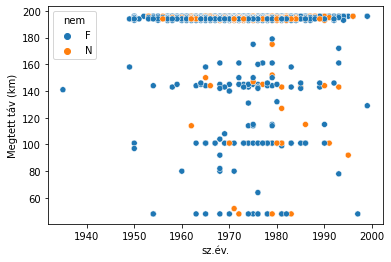

In [81]:
sns.scatterplot(x='sz.év.', y='Megtett táv (km)', hue='nem', data=bszm)

### Pont-pont diagram ami átlagos tempó alapján mutatja a megtett kilómétert

Mivel a két diagram meglehetősen hasonlít egymásra, észrevehető itt is az előző minta.

<AxesSubplot:xlabel='Megtett táv (km)', ylabel='átlagos tempó (perc/km)'>

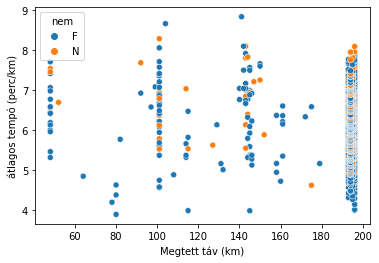

In [82]:
sns.scatterplot(x='Megtett táv (km)', y='átlagos tempó (perc/km)', hue='nem', data=bszm)

### Versenyzők átlag tempójának az eloszlása

<AxesSubplot:xlabel='átlagos tempó (perc/km)', ylabel='Density'>

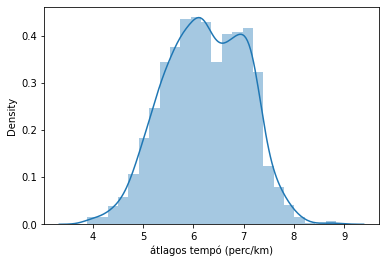

In [83]:
sns.distplot(bszm['átlagos tempó (perc/km)'])

### Versenyzők születési éveinek eloszlása

<AxesSubplot:xlabel='sz.év.', ylabel='Density'>

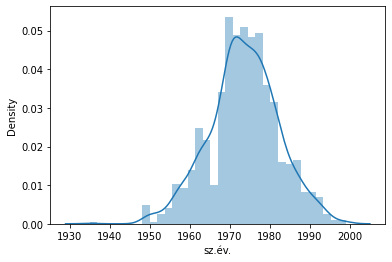

In [84]:
sns.distplot(bszm['sz.év.'])

### Célba ért személyek száma kategóriákként

In [85]:
topKorcsoport = bszm.groupby('Kategória').agg({
    'befejezte' : 'sum'
}).sort_values('befejezte', ascending=False)[:10]

,befejezte
Kategória,
F3,284.0
F4,128.0
N2,110.0
F2,99.0
F1,74.0
N1,29.0
F5,26.0
N3,24.0
N4,4.0


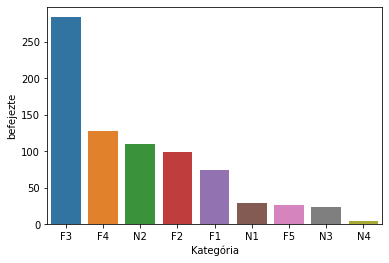

In [86]:
sns.barplot(y='befejezte', x='Kategória', data=topKorcsoport.reset_index())
topKorcsoport

### Célba ért személyek száma sebesség kategória szerint

In [87]:
sebessegKitartas = bszm_osszes.groupby('sebesség kategória').agg({
    'befejezte' : 'sum'
}).sort_values('befejezte', ascending=False)[:10]

,befejezte
sebesség kategória,
közepesen lassú,167.0
közepes,166.0
közepesen gyors,156.0
gyors,145.0
lassú,144.0


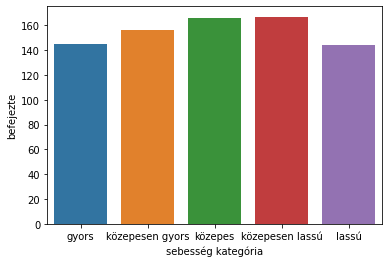

In [88]:
sns.barplot(y='befejezte', x='sebesség kategória', data=sebessegKitartas.reset_index())
sebessegKitartas

Jól látható hogy az adathalmaz adatait rengeteg féle módon tudjuk vizualizálni. 

# Osztályozás

Miután már vizualizáltunk, itt az ideje hogy osztályozzunk is. A kérdés egyszerű, a megadott személyünk képes-e lefutni a Balatoni szupermaratont vagy nem.

Ehhez importáljuk a szükséges könyvtárakat.

In [89]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Előkészületek

Először is szükségünk lesz átdolgozni az adathalmazunkat.

Kelleni fog a dummy változók alkalmazása, ahhoz, hogy eltudjuk készíteni a modellünket.

In [90]:
bszm['nem'] = pd.get_dummies(bszm['nem'], drop_first=True)
bszm['befejezte'] = pd.get_dummies(bszm['befejezte'], drop_first=True)

In [91]:
bszm.head()

,sz.év.,Kategória,nem,eredmény,Megtett táv (km),befejezte,eredmény(perc),átlagos tempó (perc/km),sebesség kategória
0,1977.0,F3,0,0 days 13:02:08,196.0,1,782.0,3.989796,gyors
1,1988.0,F1,0,0 days 13:06:48,196.0,1,786.0,4.010204,gyors
2,1982.0,F2,0,0 days 14:05:35,196.0,1,845.0,4.311224,gyors
3,1986.0,F1,0,0 days 14:22:47,196.0,1,862.0,4.397959,gyors
4,1978.0,F3,0,0 days 14:42:39,196.0,1,882.0,4.500000,gyors


Átmásoljuk egy új adathalmazba az előző adathalmazunk néhány oszlopát, amikkel a továbbikban szeretnénk dolgozni.<br/>
Miután ez megvan, a maradék attribútumhoz is létre hozunk dummy változókat, amiket hozzá fűzünk az új adathalmazhoz, úgy, hogy a az oszlopokat amikből dummy változót készítettünk, kidobáljuk. 

Ezután az adathalmazunk az alábbiként néz ki:

In [92]:
bszmC = bszm[['befejezte', 'Kategória', 'nem', 'sebesség kategória']]
#bszmC['Kategória'] = pd.get_dummies(bszmC['Kategória'], drop_first=True)

one_hot_kategoria = pd.get_dummies(bszmC['Kategória'])
one_hot_sebesseg = pd.get_dummies(bszmC['sebesség kategória'])

one_hot_kategoria
one_hot_sebesseg

bszmC = bszmC.drop('Kategória', axis=1)
bszmC = bszmC.drop('sebesség kategória', axis=1)

bszmC = bszmC.join(one_hot_kategoria)
bszmC = bszmC.join(one_hot_sebesseg)

bszmC

,befejezte,nem,F1,F2,F3,F4,F5,N1,N2,N3,N4,gyors,közepes,közepesen gyors,közepesen lassú,lassú
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1550,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1551,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1552,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Ezután be kell állítani az **osztálycímkét**, és a **leíró változókat**

In [93]:
classlabel = list(bszmC.columns[:1])
features = list(bszmC.columns[1:])
print('Osztálycímke:', classlabel)
print('leíró változók:', features)

Osztálycímke: ['befejezte']
leíró változók: ['nem', 'F1', 'F2', 'F3', 'F4', 'F5', 'N1', 'N2', 'N3', 'N4', 'gyors', 'közepes', 'közepesen gyors', 'közepesen lassú', 'lassú']


Miután ezzel is megvagyunk, létrehozhatjuk a test, és a training halmazunkat is.

In [94]:
# DataFrame-et TULAJDONSÁGOK(features, X) és CÉL(target, y) tömbökre bontjuk 
X = bszmC.iloc[:, 1:].values
y = bszmC.iloc[:, 0].values.reshape(-1,1)

In [95]:
# Tréning és teszt adatok létrehozása 2/3 és 1/3 vágással
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Ha ez is megvan, már lehet ezt használni a továbbiakban.

### Döntési fa

#### Először is hozzuk létre a modellt.

In [96]:
clf_dtree = DecisionTreeClassifier()
print(clf_dtree)

DecisionTreeClassifier()


#### Hajtsuk végre a döntési fával a tanítást.

In [97]:
clf_dtree = clf_dtree.fit(X_train,y_train)

#### Osztálycímkére vonatkozó becslés

In [98]:
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_dtree

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

#### A modell valós pontossága paraméterek nélkül

In [99]:
print("Paraméterek nélküli pontosság:", accuracy_score(y_test, y_pred_dtree))

Paraméterek nélküli pontosság: 0.6232741617357002


#### Felparaméterezve

In [100]:
clf_dtree2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=7, min_samples_split=3)
clf_dtree2 = clf_dtree2.fit(X_train,y_train)
y_pred_dtree2 = clf_dtree2.predict(X_test)
print("Paraméteres pontosság:",accuracy_score(y_test, y_pred_dtree2))

Paraméteres pontosság: 0.6094674556213018


#### A döntési fa grafikus megjelenítése

In [101]:
dot_data = export_graphviz(clf_dtree2, out_file=None, 
                      feature_names=features,
                      class_names=["nem fejezte be", "befejezte"],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### Érdekességként

Kiváncsiságból kipróbáltam más osztályozással is. Az SVC és a Random Forest tudott hasonló modell pontosságot produkálni.

#### Support Vector osztályozó

In [102]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train.ravel())

SVC()

In [103]:
y_pred_svm = clf_svm.predict(X_test)
print(y_pred_svm)

[1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1
 0 0 0 1 0 1 1 1 1 0 0 1 

In [104]:
# Modell kiértékelése
print("A modell pontossága:", clf_svm.score(X_test,y_test))

A modell pontossága: 0.6232741617357002


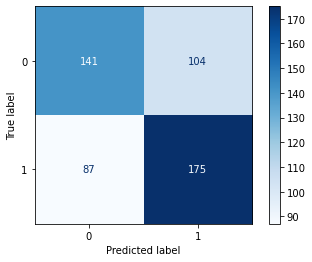

In [105]:
plot_confusion_matrix(clf_svm, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

#### Random forest osztályozó

In [106]:
clf_rfc = RandomForestClassifier()
clf_rfc = clf_rfc.fit(X_train, y_train.ravel())

In [107]:
# Osztálycímke "jóslása"
y_pred_rfc = clf_rfc.predict(X_test)
print(y_pred_rfc)

[1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1
 0 0 0 1 0 1 1 1 1 0 0 1 

In [108]:
# Modell kiértékelése
print("A modell pontossága:", clf_rfc.score(X_test,y_test))

A modell pontossága: 0.6173570019723866


# Összegzés

A beadandó során alkalmam volt gyakorolni az adattisztítási adatranszformálási feladatokat, így nagyobb rálátást tudtam szerezni az adatbányászat műveleteire. Grafikonok segítségével lehetőség volt érdekes mintázatokat is feltárni, majd az osztályozás segítségével létrehoztam modelleket, amiknek a pontosságai különböznek.

Konklúzióként azt tudom levonni, hogy valószínüleg azokból az attrimútumokból amelyekkel én próbáltam modellt tanítani, nem fogunk tudni pontosan kimenetelt megjósolni, mivel a pontossága nem a legmagasabb.